# Lab 9 - Network Data Analytics
## 3. Information Diffusion

It is also known as graph activation process, e.g. http://ncase.me/crowds/

Further readings:
+ https://stackoverflow.com/questions/31815454/animate-graph-diffusion-with-networkx
+ https://stackoverflow.com/questions/27475211/animating-a-network-graph-to-show-the-progress-of-an-algorithm/

34

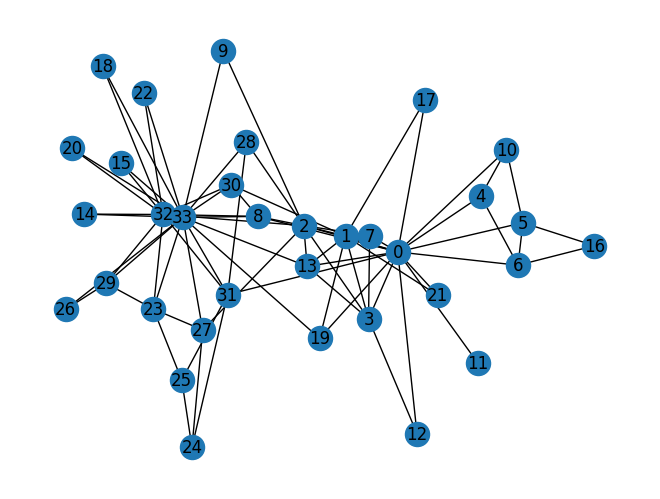

In [18]:
from __future__ import print_function, division
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.draw(G, with_labels=True)
len(G.nodes)

### 3.1. Diffusion process
Now we implement the diffusion process. Each active node will cause other nodes in the graph to become active over time. The diffusion rule is that a node gets active if at least a certain percentage of its neighbors become active. The process continues until convergence (i.e. has no new node activated).

OPTIONAL: Can you implement a data visualization to illustrate the diffusion proceess?

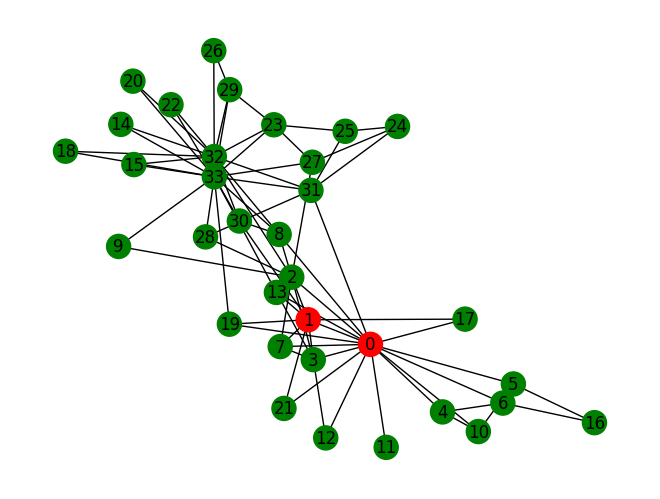

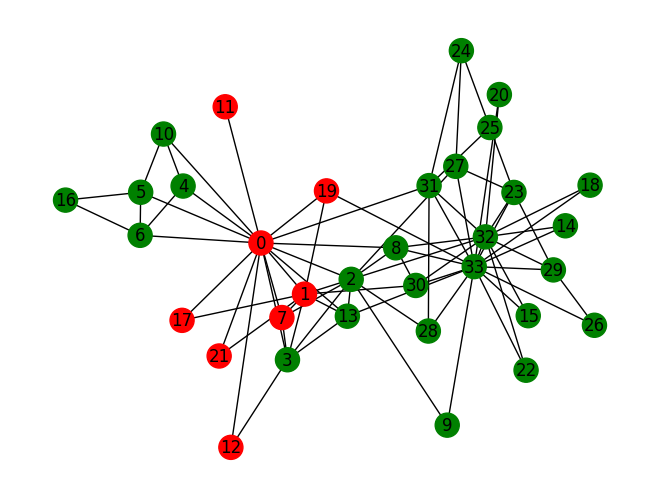

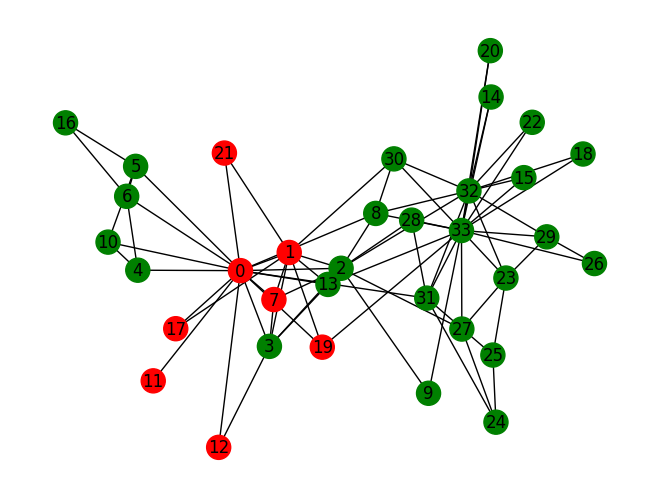

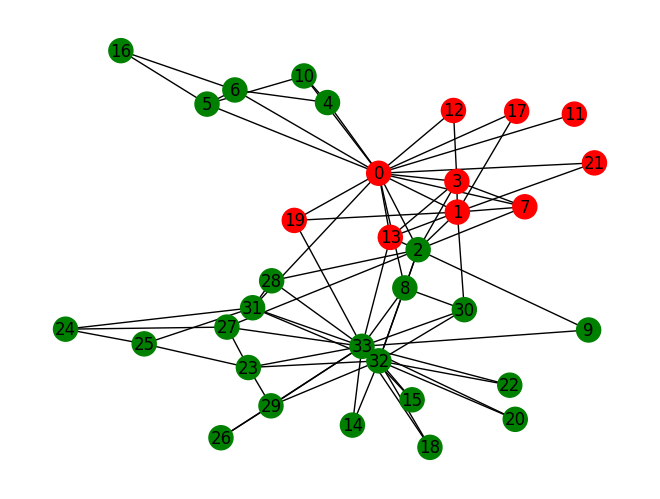

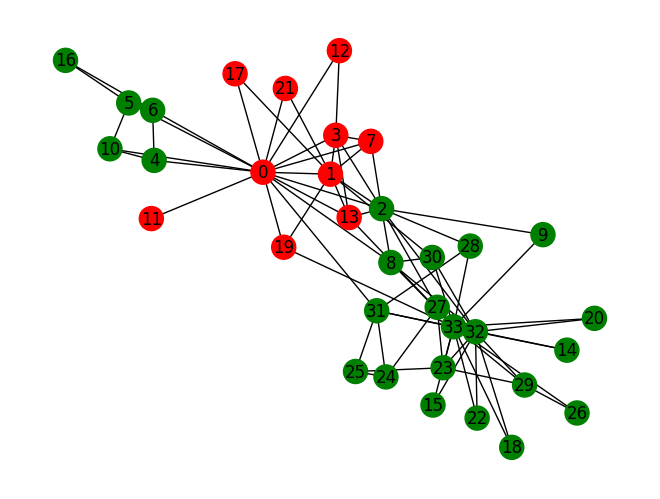

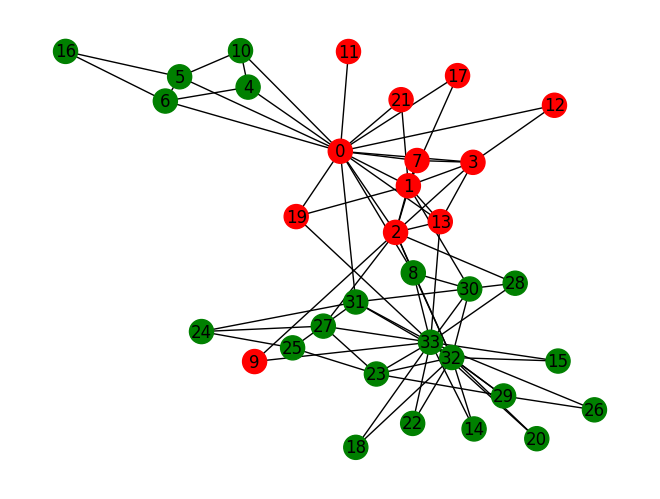

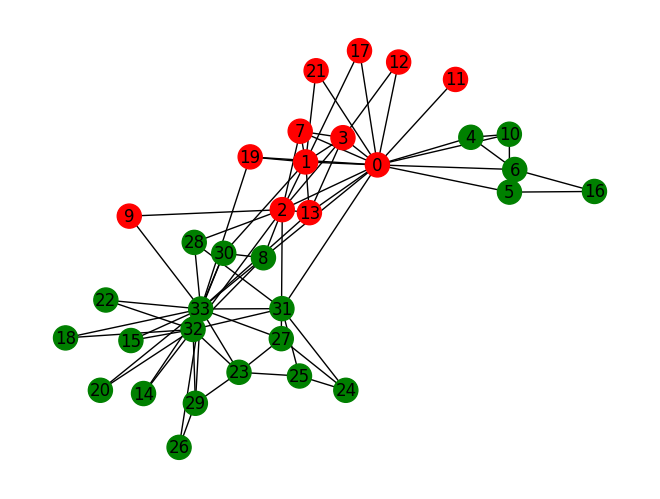

In [17]:
def drawGraph(G, active):
    cmap = []
    for n in G.nodes():
        if n in active:
            cmap.append('r')
        else:
            cmap.append('g')
    nx.draw(G, node_color= cmap, with_labels = True)
    plt.show()

def diffusion(graph, seed_set, draw, thr=0.5):
    active = seed_set
    if draw:
        drawGraph(graph, active)
    has_changed = False
    
    # TODO: loop through not active nodes and activate a node of more than "thr" percent of its neighbors are active
    for n in filter(lambda n: n not in active, graph.nodes()):
        if len(set(filter(lambda neighbour: neighbour in active, graph.neighbors(n)))) >= thr * len(list(graph.neighbors(n))):
            active.add(n)
            has_changed = True
    if has_changed:
        if draw:
            drawGraph(graph, active)
        return diffusion(graph, active, draw, thr) # union of two sets
    return active

activeNodes = diffusion(G, {0,1}, True)



### 3.2. Influence Maximization

Now we find a minimal set of seeds that maximize the influence (i.e. the number of active nodes). The influence maximization problem is NP-hard in general. Here, we use greedy algorithm which iteratively chooses a seed such that the gain of influence is maximal.

{0, 33}
29


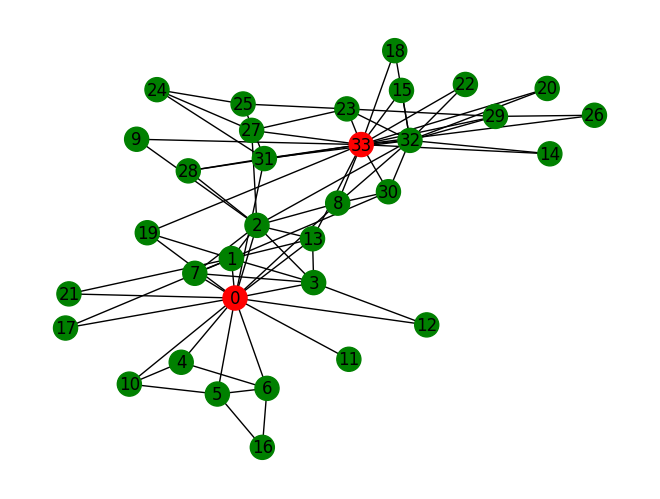

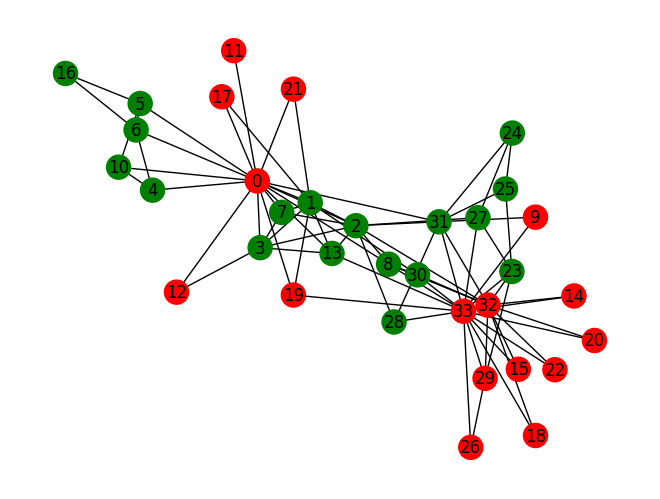

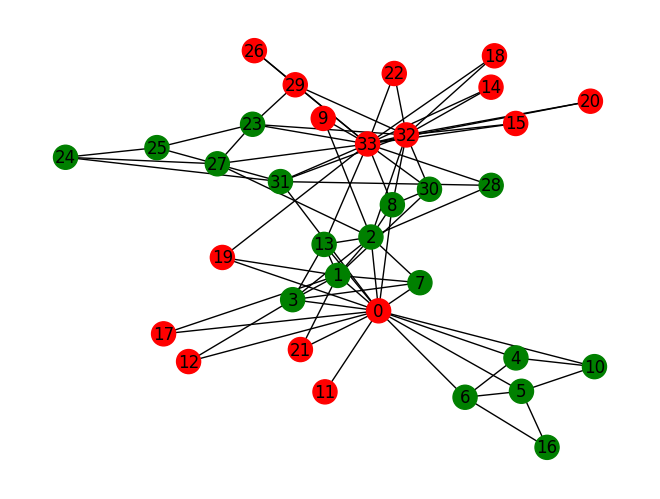

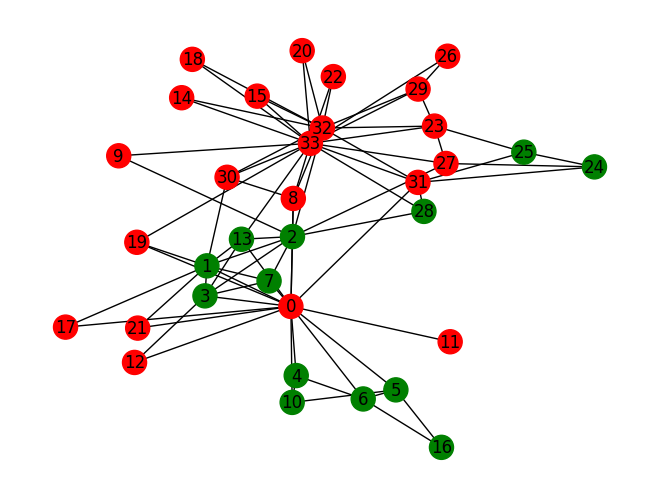

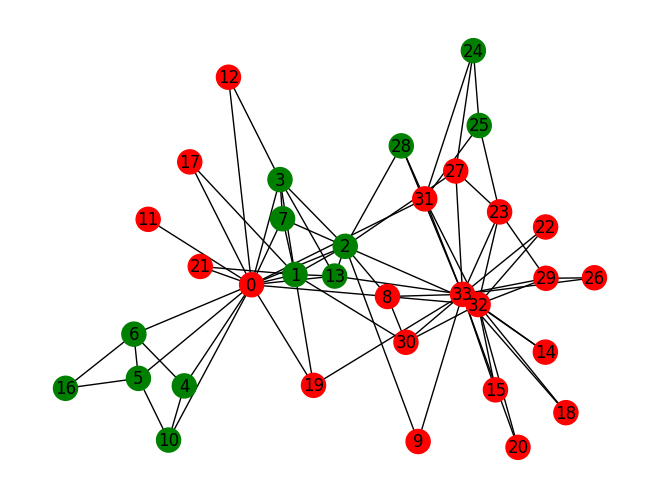

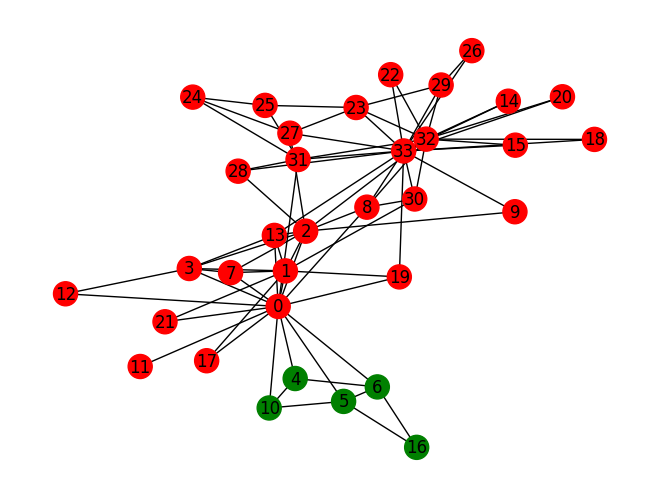

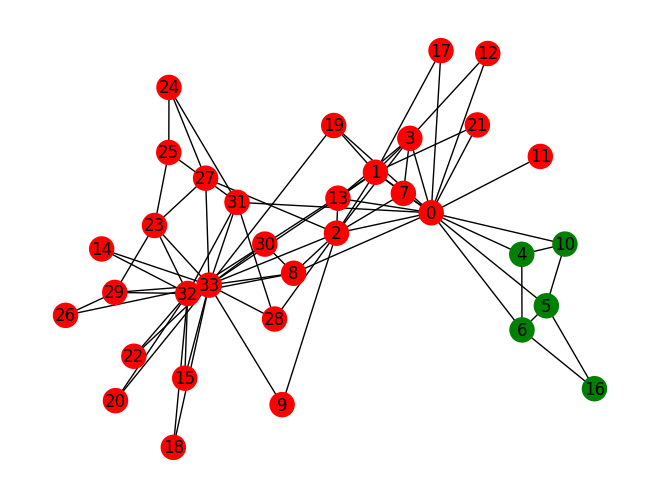

{0,
 1,
 2,
 3,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33}

In [25]:
def utility(graph, seeds, thr=0.5):
    return len(diffusion(graph, seeds.copy(), False, thr))

def greedy(graph, k=3, thr=0.5):
    seeds = set()
    for i in range(k):
        max_gain = 0
        chosen_seed = -1
        
        for n in graph.nodes():
            gain = utility(graph, seeds | {n}) - utility(graph, seeds)
            if gain > max_gain:
                max_gain = gain
                chosen_seed = n
        if max_gain > 0:
            seeds = seeds | {chosen_seed}
        else:
            break
    return seeds

seeds = greedy(G,2)
print(seeds)
print(utility(G, seeds))

diffusion(G, seeds, True)